<a href="https://colab.research.google.com/github/hyprex-deva/Cat-vs-Dog/blob/main/Iris_Flowers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Iris Flowers Classification`**
-By Debapam Pal 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
iris=pd.read_csv("iris.csv")  #Dataset "iris.csv"
iris.sample(10)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
78,79,6.0,2.9,4.5,1.5,versicolor
34,35,4.9,3.1,1.5,0.2,setosa
135,136,7.7,3.0,6.1,2.3,virginica
90,91,5.5,2.6,4.4,1.2,versicolor
44,45,5.1,3.8,1.9,0.4,setosa
41,42,4.5,2.3,1.3,0.3,setosa
93,94,5.0,2.3,3.3,1.0,versicolor
100,101,6.3,3.3,6.0,2.5,virginica
130,131,7.4,2.8,6.1,1.9,virginica
33,34,5.5,4.2,1.4,0.2,setosa


In [3]:
print(iris.shape)

(150, 6)


In [4]:
print(iris.describe())

       Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.057333      3.758000     1.199333
std     43.445368      0.828066     0.435866      1.765298     0.762238
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000


In [5]:
iris.isna().sum()  #Checking if any values are NULL

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [6]:
n = len(iris[iris['Species'] == 'versicolor'])
n1 = len(iris[iris['Species'] == 'virginica'])
n2 = len(iris[iris['Species'] == 'setosa'])
print("No of Versicolor in Dataset:",n)
print("No of Virginica in Dataset:",n1)
print("No of Setosa in Dataset:",n2)

No of Versicolor in Dataset: 50
No of Virginica in Dataset: 50
No of Setosa in Dataset: 50


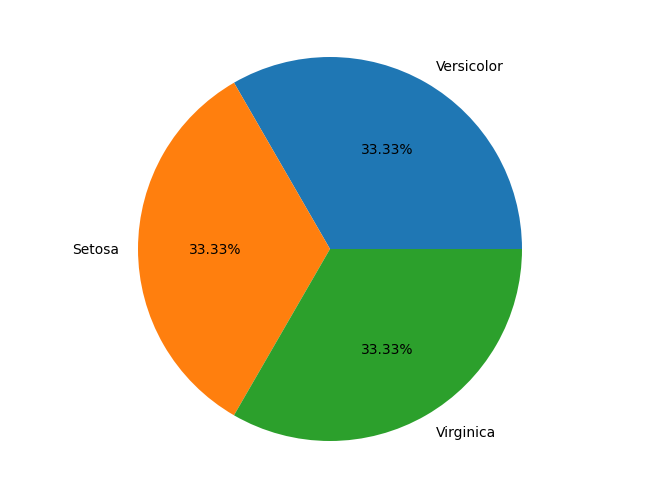

In [7]:
fig = plt.figure()  #Piechat of the 3 type of Flower
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [24]:
train_X = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
train_y = train.Species

test_X = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
test_y = test.Species

In [25]:
train_X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
123,6.3,2.7,4.9,1.8
99,5.7,2.8,4.1,1.3
58,6.6,2.9,4.6,1.3
133,6.3,2.8,5.1,1.5
33,5.5,4.2,1.4,0.2


In [26]:
train_y.head()

123     virginica
99     versicolor
58     versicolor
133     virginica
33         setosa
Name: Species, dtype: object

In [27]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 1.0


In [28]:
#Confusion Matrix of LogisticRegression
confusion_matrix = metrics.confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_matrix)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[17  0  0]
 [ 0 13  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [39]:
#Using KNN
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.9736842105263158


In [30]:
#Confusion Matrix of KNN
confusion_matrix = metrics.confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_matrix)
print(classification_report(test_y,y_pred2))

Confusion matrix: 
 [[17  0  0]
 [ 0 13  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.92      0.96        13
   virginica       0.89      1.00      0.94         8

    accuracy                           0.97        38
   macro avg       0.96      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [31]:
#Using Gaussian Naive Bayes
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

Accuracy Score: 0.9473684210526315


In [32]:
#Confusion Matrix of Gaussian Naive Bayes
confusion_matrix = metrics.confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_matrix)
print(classification_report(test_y,y_pred3))

Confusion matrix: 
 [[17  0  0]
 [ 0 13  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.75      0.86         8

    accuracy                           0.95        38
   macro avg       0.96      0.92      0.93        38
weighted avg       0.95      0.95      0.95        38



In [35]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Naive Bayes'],
    'Score': [1.0,0.97,0.94]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
1.00,Logistic Regression
0.97,KNN
0.94,Naive Bayes


# **Logistic Regression has the most accuracy of 1.0**

In [36]:
print(prediction)

['versicolor' 'setosa' 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa'
 'versicolor' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica' 'virginica'
 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica']


In [38]:
print(test_y)

72     versicolor
31         setosa
45         setosa
22         setosa
57     versicolor
32         setosa
134     virginica
92     versicolor
28         setosa
119     virginica
60     versicolor
66     versicolor
90     versicolor
139     virginica
62     versicolor
48         setosa
78     versicolor
15         setosa
2          setosa
87     versicolor
4          setosa
23         setosa
16         setosa
80     versicolor
96     versicolor
18         setosa
7          setosa
69     versicolor
121     virginica
113     virginica
128     virginica
82     versicolor
12         setosa
41         setosa
47         setosa
29         setosa
125     virginica
145     virginica
Name: Species, dtype: object


# **Both the Prediction Data and the Original Data is the exact same. Hence Accuracy is 1.0**